In [10]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, hbar, k


import sys

sys.path.append('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from elements import *

import measurement as me

### BAE

### Defining the OM system

In [64]:
omega_cav = 5e9*np.pi*2
kappa_0 = 0.3e6*np.pi*2
kappa_ex = 0.4e6*np.pi*2

omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

g_0 = 200*np.pi*2

P_in = 8e-10
Delta = -omega_m
omega_cont = omega_cav + Delta
T_cont = 1

from DCnonlinearities import optomechanics

omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_cav, omega_cont, omega_m, g_0)

g= omdir['g']
omega_cav = omdir['omega_c']


a = Mode('a', omega_cav)
b = Mode('b', omega_m)

#a_cont = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_cont, bath_temp = T_cont)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

sys_om = System([a, b], [a_in0, b_in0], [g_ab])

print ('Cooperativity C: ',4*g**2/a.kappa/gamma_m)

Cooperativity C:  3279.5703589318314


<IPython.core.display.Javascript object>


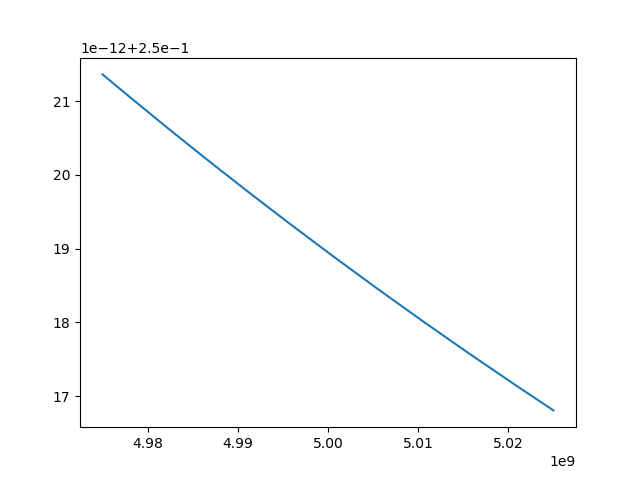

In [66]:
omegas = omega_cav + np.linspace(-5 * omega_m,  5 * omega_m, 1000)

def spec_in(omega, T):
    return 0.5 / (np.exp(hbar*omega/k/T) - 1) + 0.25 * np.ones_like(omega)

T = 10e-3
omegas_red = omegas - 2 * omega_m
omegas_blue = omegas + 2 * omega_m
X_minus = (1 / (a.kappa/2 - 1j*omegas_red)) * np.sqrt(a.kappa) * spec_in(omegas_red,T)
X_plus = (1 / (a.kappa/2 - 1j*omegas_blue)) * np.sqrt(a.kappa) * spec_in(omegas_blue,T)

X_out = spec_in(omegas,T ) + np.sqrt(gamma_m) * (1 / (gamma_m/2 - 1j*omegas)) * (np.sqrt(gamma_m) * spec_in(omegas,T) + 1j * g * (X_plus -X_minus))

plt.plot(omegas/2/np.pi, np.abs(X_out))
